C:\Users\E\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\E\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


activation_function set
Using downloaded and verified file: .\cifar10.tgz
['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
torch.Size([3, 32, 32]) 0
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Label:  airplane (0)
cut data


TypeError: __init__() missing 2 required positional arguments: 'in_channels' and 'num_classes'

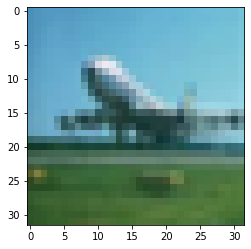

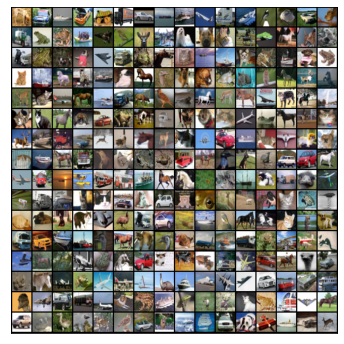

In [1]:
# -*- coding: utf-8 -*-
"""cifar-10-kg.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/13R8T8i5OYbyyvjesEFC0cIwXebdGO4bp

# CIFAR-10 Classification using pytorch
The notebook is devided into two part:
* Section A where the model is trained with a simple CNN to achieve **75%+ accuracy**
* Section B where the model is trained using ResNet9 and various other techniques like data augmentation, batch normalization, channel normalization, etc to achieve **93%+ accuracy**

# Using a simple CNN model
Bulding a simple CNN to achieve 75% + accuracy
"""

# Commented out IPython magic to ensure Python compatibility.
# importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
import time
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torch.nn as nn

"""We'll download the images in PNG format from [this page](https://course.fast.ai/datasets), using some helper functions from the `torchvision` and `tarfile` packages."""
#..............................our part...................................#

#what number the paramter start and end
fromI=1
toI=100

fromL=0.1
toL=1000

fromQ=0.1
toQ=100

LogarithmINC=True#insted of incresing when checking parameters with a constant , will will get to the to value useing geometric progression

#size of splits will, example fromI=1 toI=3,SIZEI=3 then i will check 1,2,3
SIZEI=3#how many i to check
SIZEL=5#how many l to check
SIZEQ=5#how many q to check

checkCertainParams=True
#if the one above is true set the parameters u want to check else it will igonre the values
L=0.1#0.1->2
Q=6.3095734448 #0.01->0.2
P=2 #NO CHANGE
Z=10# NO CHANGE
I=1#1->3


#funcation  :  x + (L / (Q * (x + I) ** P + Z)) - (L / (Q * (x - I) ** P + Z)):https://www.desmos.com/calculator/0hiyjyun2f (move points to play with the parameters)
train_running_size=50000#train size of data
val_running_Size=512#val size of data
setAll=False# will train and predict useing all the data ignoring the 2 above
batch_size = 256 #hyper parameter

num_epochs = 16
opt_func = torch.optim.Adam
lr = 0.001

if(checkCertainParams):
    L0=L
    Q0=Q
    I0=I
    Z0=Z
    P0=P

def dynamic(input):
    x=input
    x[x<0]=0
    if (checkCertainParams):
        x = x + (L0 / (Q0 * (x + I0) ** P0 + Z0)) - (L / (Q0 * (x - I0) ** P0 + Z0))
    else:
        x = x + (L / (Q * (x + I) ** P + Z)) - (L / (Q * (x - I) ** P + Z))
    return x

class Dynamic(nn.Module):
    def __init__(self):
        super().__init__() # init the base class
    def forward(self, input):
        return dynamic(input) # simply apply already implemented SiLU

def relu(input):
    x=input
    x[x<0]=0
    return x

class RELU(nn.Module):
    def __init__(self):
        super().__init__() # init the base class
    def forward(self, input):
        return relu(input) # simply apply already implemented SiLU

def setParams(L_,Q_,P_,Z_,I_):
    global L
    global Q
    global P
    global Z
    global I
    L = L_
    Q = Q_
    P = P_
    Z = Z_
    I = I_

    pass

activation_function = RELU()
print("activation_function set")

#..............................end of our part...................................#


#download dataset
dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
download_url(dataset_url, '.')

# Extract from .tgz archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path = './data')

"""dataset is extracted to `data/cifar10`. It contains two folders - `train` and `test` containing 50,000 and 10,000 images resp. Each of them contains 10 folders, one for each class of images."""

data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

# Loading the datset
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

img, label = dataset[0]
print(img.shape, label)
img

print(dataset.classes)

# Viewing an image

def show_img(img, label):
  print('Label: ', dataset.classes[label], '(' + str(label) + ')')
  plt.imshow(img.permute(1, 2, 0)) # permute changes the position of dimentions

show_img(*dataset[100])

"""### Training and val datasets"""

random_seed = 10
torch.manual_seed(random_seed)

val_size = 5000
train_size = len(dataset) - val_size

#splitting the ds
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

from torch.utils.data.dataloader import DataLoader



#Loading Data
#..............................our part...................................#
print("cut data")
if(setAll):
    train_running_size=len(train_ds)
    val_running_Size=len(val_ds)
train_ds, empty=random_split(train_ds, [train_running_size, len(train_ds)-train_running_size])
val_ds, empty=random_split(val_ds,[val_running_Size,len(val_ds)-val_running_Size])
#..............................end of our part...................................#
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 2, pin_memory = True)

from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow = 16).permute(1,2,0))
    break

show_batch(train_dl)

"""### Model
We'll define a CNN (Convolutional Neural Networ)
"""

# importing libraries
import torch.nn as nn
import torch.nn.functional as F

"""Extending nn.Module"""

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

"""Building the architecture of our CNN model"""

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class Cifar10CnnModel(ImageClassificationBase):
    # def __init__(self):
    #     super().__init__()
    #     self.network = nn.Sequential(
    #         nn.Conv2d(3, 32, kernel_size=3, padding=1),
    #         activation_function,
    #         nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    #         activation_function,
    #         nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

    #         nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    #         activation_function,
    #         nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    #         activation_function,
    #         nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

    #         nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    #         activation_function,
    #         nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
    #         activation_function,
    #         nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

    #         nn.Flatten(),
    #         nn.Linear(256*4*4, 1024),
    #         activation_function,
    #         nn.Linear(1024, 512),
    #         activation_function,
    #         nn.Linear(512, 10))
        
    # def forward(self, xb):
    #     return self.network(xb)
    # class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


model = Cifar10CnnModel()
model

for images, labels in train_dl:
  print('images.shape: ', images.shape)
  out = model(images)
  print('out.shape: ', out.shape)
  print('out[0:]: ', out[0])
  break

"""### GPU"""

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('dml')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

"""### Training the Model

Defining two models - evaluate and fit
"""

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

evaluate(model, val_dl)

"""As expected the accuracy is cloase to 10 %"""

# Hyperparameters



def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs. No. of epochs')
  plt.show()

#..............................our part...................................#

bestScore=0
bestI=0
bestQ=0
bestL=0

print("RELU:")
tic = time.time()
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)
toc = time.time()
print("time took:", toc - tic)
score = history[len(history) - 1]["val_acc"]
print(score," final score of relu")

activation_function = Dynamic()
plot_accuracies(history)

for i in range(SIZEI):
    for l in range(SIZEL):
        for q in range(SIZEQ):
            model = Cifar10CnnModel()
            to_device(model, device)
            evaluate(model, val_dl)

            I_=fromI+i*(toI-fromI)/SIZEI
            Q_=fromQ+q*(toQ-fromQ)/SIZEQ
            L_=fromL+l*(toL-fromL)/SIZEL

            if(LogarithmINC):
                I_=(((toI/fromI)**(1/SIZEI))**i)*fromI
                Q_=(((toQ/fromQ)**(1/SIZEQ))**q)*fromQ
                L_=(((toL/fromL)**(1/SIZEL))**l)*fromL
                pass
            setParams(L_,Q_,P,Z,I_)
            tic = time.time()
            history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)
            toc = time.time()
            print("time took:", toc - tic)
            score=history[len(history)-1]["val_acc"]
            if score>bestScore:
                bestI = I_
                bestQ = Q_
                bestL = L_
                bestScore=score
            print(score,"with i=",I_,"q=",Q_,"l=",L_)



print("best score:",bestScore,"with i=",I_,"q=",Q_,"l=",L_)
#..............................end of our part...................................#


plot_accuracies(history)

def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss vs No. of epochs')

plot_losses(history)

"""There seems to be some overfitting, which we shall try to minimize in the next section

### Testing
"""

test_dataset = ImageFolder(data_dir + '/test', transform = ToTensor())

def predict_image(imag, model):
  #convert to a batch of 1
  xb = to_device(img.unsqueeze(0), device)

  #get preds from model
  yb = model(xb)

  #pick index with highest probability
  _, preds = torch.max(yb, dim = 1)

  #Retrive the class label
  return dataset.classes[preds[0].item()]

img, label = test_dataset[0]
plt.imshow(img.permute(1,2,0))
print('Label: ', dataset.classes[label], ', Predicted: ', predict_image(img, model))

test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

"""### Saving the model"""

torch.save(model.state_dict(), 'cifar10-cnn.pth')

#---------- To load the model ----------

# model2 = to_device(Cifar10CnnModel(), device)
# model2.load_state_dict(torch.load('cifar10-cnn.pth'))

"""<hr><hr>

# Section 2: Using Resnet9 and various other techniques 
Target is to achieve 90% + accuracy
"""

# # Commented out IPython magic to ensure Python compatibility.
# import os
# import torch
# import torchvision
# import tarfile
# import torch.nn as nn
# import numpy as np
# import torch.nn.functional as F
# from torchvision.datasets.utils import download_url
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# import torchvision.transforms as tt
# from torch.utils.data import random_split
# from torchvision.utils import make_grid
# import matplotlib
# import matplotlib.pyplot as plt
# # %matplotlib inline
#
# project_name='05b-cifar10-resnet'
#
# """### Loading and Processing Dataset"""
#
# from torchvision.datasets.utils import download_url
#
# # Download the dataset
# dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
# download_url(dataset_url, '.')
#
# #Extract from archive
# with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
#   tar.extractall(path='./data')
#
# # Look into the data directory
# data_dir = './data/cifar10'
# print(os.listdir(data_dir))
# classes = os.listdir(data_dir + "/train")
# print(classes)

# """Our target is to achieve maximum accuracy. Therefore we will do following important changes:
# 1. Using test dataset as validation: to have more training data (although is it a bad practice)
# 2. Channel-wize data normalization: normalize the image tensor by subtracting the mean an divind by std deviation. It prevents the values from any one channel from disproportionately affecting the losses and gradients while training simple by having a higher or wider range.
# <img src="https://i.imgur.com/LYxXBVg.png" alt="normalization" width="30%"/>
#
# 3. Randomized data augmentation: We will apply randomly chosen transformation while loading images from the training dataset. It enables the model to see different images in each epoch of training.
# <img src="https://imgaug.readthedocs.io/en/latest/_images/cropandpad_percent.jpg" alt="data-augmentation" width = 60% />
#
# ### Data Transformation
# Normalization and Data Augmentation
# """
#
# #Data transforms (normalization and data augmentation)
#
# stats = ((0.4914, 0.4822, 0.4465),
#          (0.2023, 0.1994, 0.2010))
#
# train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'),
#                          tt.RandomHorizontalFlip(),
#                          tt.ToTensor(),
#                          tt.Normalize(*stats, inplace=True)])
#
# valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])
#
# batch_size = 500 #hyperparameter
#
# # PyTorch datasets
# train_ds = ImageFolder(data_dir+'/train', train_tfms)
# valid_ds = ImageFolder(data_dir+'/test', valid_tfms)
#
# # Pytorch Data Loaders
# train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
# valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)
#
# def denormalize(images, means, stds):
#     means = torch.tensor(means).reshape(1, 3, 1, 1)
#     stds = torch.tensor(stds).reshape(1, 3, 1, 1)
#     return images * stds + means
#
# def show_batch(dl):
#     for images, labels in dl:
#         fig, ax = plt.subplots(figsize=(12, 12))
#         ax.set_xticks([]); ax.set_yticks([])
#         denorm_images = denormalize(images, *stats)
#         ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
#         break
#
# show_batch(train_dl)
#
# """### Uploading on GPU"""
#
# ### Using a GPU
# def get_default_device():
#     """Pick GPU if available, else CPU"""
#     if torch.cuda.is_available():
#         return torch.device('cuda')
#     else:
#         return torch.device('dml')
#
# def to_device(data, device):
#     """Move tensor(s) to chosen device"""
#     if isinstance(data, (list,tuple)):
#         return [to_device(x, device) for x in data]
#     return data.to(device, non_blocking=True)
#
# class DeviceDataLoader():
#     """Wrap a dataloader to move data to a device"""
#     def __init__(self, dl, device):
#         self.dl = dl
#         self.device = device
#
#     def __iter__(self):
#         """Yield a batch of data after moving it to device"""
#         for b in self.dl:
#             yield to_device(b, self.device)
#
#     def __len__(self):
#         """Number of batches"""
#         return len(self.dl)
#
# device = get_default_device()
# device
#
# train_dl = DeviceDataLoader(train_dl, device)
# valid_dl = DeviceDataLoader(valid_dl, device)
#
# """### Model with Residual Block and batch normalization
# One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers
# <br><br>
# <img src="https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png"/>
#
# Defining a Simple Residual Block
# """
#
# class SimpleResidualBlock(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
#         self.relu1 = nn.ReLU()
#         self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
#         self.relu2 = nn.ReLU()
#
#     def forward(self, x):
#         out = self.conv1(x)
#         out = self.relu1(out)
#         out = self.conv2(out)
#         return self.relu2(out) + x # ReLU can be applied before or after adding the input
#
# simple_resnet = to_device(SimpleResidualBlock(), device)
#
# for images, labels in train_dl:
#     out = simple_resnet(images)
#     print(out.shape)
#     break
#
# del simple_resnet, images, labels
# torch.cuda.empty_cache()
#
# """We shall use ResNet architecture.
# <img src='https://raw.githubusercontent.com/lambdal/cifar10-fast/master/net.svg' />
#
# Extending nn.Module class
# """
#
# def accuracy(outputs, labels):
#     _, preds = torch.max(outputs, dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))
#
# class ImageClassificationBase(nn.Module):
#     def training_step(self, batch):
#         images, labels = batch
#         out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
#         return loss
#
#     def validation_step(self, batch):
#         images, labels = batch
#         out = self(images)                    # Generate predictions
#         loss = F.cross_entropy(out, labels)   # Calculate loss
#         acc = accuracy(out, labels)           # Calculate accuracy
#         return {'val_loss': loss.detach(), 'val_acc': acc}
#
#     def validation_epoch_end(self, outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
#
#     def epoch_end(self, epoch, result):
#         print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
#             epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
#
# """Building our architecture:"""
#
# def conv_block(in_channels, out_channels, pool=False):
#     layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#               nn.BatchNorm2d(out_channels),
#               nn.ReLU(inplace=True)]
#     if pool: layers.append(nn.MaxPool2d(2))
#     return nn.Sequential(*layers)
#
# class ResNet9(ImageClassificationBase):
#     def __init__(self, in_channels, num_classes):
#         super().__init__()
#
#         self.conv1 = conv_block(in_channels, 64)
#         self.conv2 = conv_block(64, 128, pool=True)
#         self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
#
#         self.conv3 = conv_block(128, 256, pool=True)
#         self.conv4 = conv_block(256, 512, pool=True)
#         self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
#
#         self.classifier = nn.Sequential(nn.MaxPool2d(4),
#                                         nn.Flatten(),
#                                         nn.Dropout(0.2),
#                                         nn.Linear(512, num_classes))
#
#     def forward(self, xb):
#         out = self.conv1(xb)
#         out = self.conv2(out)
#         out = self.res1(out) + out
#         out = self.conv3(out)
#         out = self.conv4(out)
#         out = self.res2(out) + out
#         out = self.classifier(out)
#         return out
#
# model = to_device(ResNet9(3, 10), device)
# model
#
# """### Training the Model
# The improvements in fit functions are:
# 1. Learning rate scheduling: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. We will use one cycle policy [1cycle policy](https://sgugger.github.io/the-1cycle-policy.html).
# 2. Weight Decay: A regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.
# 3. Gradient clipping: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values
#
# """
#
# @torch.no_grad()
# def evaluate(model, val_loader):
#     model.eval()
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)
#
# def get_lr(optimizer):
#     for param_group in optimizer.param_groups:
#         return param_group['lr']
#
# def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
#                   weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
#     torch.cuda.empty_cache()
#     history = []
#
#     # Set up cutom optimizer with weight decay
#     optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
#     # Set up one-cycle learning rate scheduler
#     sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
#                                                 steps_per_epoch=len(train_loader))
#
#     for epoch in range(epochs):
#         # Training Phase
#         model.train()
#         train_losses = []
#         lrs = []
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             train_losses.append(loss)
#             loss.backward()
#
#             # Gradient clipping
#             if grad_clip:
#                 nn.utils.clip_grad_value_(model.parameters(), grad_clip)
#
#             optimizer.step()
#             optimizer.zero_grad()
#
#             # Record & update learning rate
#             lrs.append(get_lr(optimizer))
#             sched.step()
#
#         # Validation phase
#         result = evaluate(model, val_loader)
#         result['train_loss'] = torch.stack(train_losses).mean().item()
#         result['lrs'] = lrs
#         model.epoch_end(epoch, result)
#         history.append(result)
#     return history
#
# # Evaluating the model before training
# history = [evaluate(model, valid_dl)]
# history
#
# epochs = 16
# max_lr = 0.01
# grad_clip = 0.1
# weight_decay = 1e-4
# opt_func = torch.optim.Adam
#
# # Commented out IPython magic to ensure Python compatibility.
# # %%time
# # history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
# #                              grad_clip=grad_clip,
# #                              weight_decay=weight_decay,
# #                              opt_func=opt_func)
#
# def plot_accuracies(history):
#     accuracies = [x['val_acc'] for x in history]
#     plt.plot(accuracies, '-x')
#     plt.xlabel('epoch')
#     plt.ylabel('accuracy')
#     plt.title('Accuracy vs. No. of epochs');
#
# plot_accuracies(history)
#
# def plot_losses(history):
#     train_losses = [x.get('train_loss') for x in history]
#     val_losses = [x['val_loss'] for x in history]
#     plt.plot(train_losses, '-bx')
#     plt.plot(val_losses, '-rx')
#     plt.xlabel('epoch')
#     plt.ylabel('loss')
#     plt.legend(['Training', 'Validation'])
#     plt.title('Loss vs. No. of epochs');
#
# plot_losses(history)
#
# def plot_lrs(history):
#     lrs = np.concatenate([x.get('lrs', []) for x in history])
#     plt.plot(lrs)
#     plt.xlabel('Batch no.')
#     plt.ylabel('Learning rate')
#     plt.title('Learning Rate vs. Batch no.');
#
# plot_lrs(history)
#
# """## Testing with individual images
#
# """
#
# def predict_image(img, model):
#     # Convert to a batch of 1
#     xb = to_device(img.unsqueeze(0), device)
#     # Get predictions from model
#     yb = model(xb)
#     # Pick index with highest probability
#     _, preds  = torch.max(yb, dim=1)
#     # Retrieve the class label
#     return train_ds.classes[preds[0].item()]
#
# img, label = valid_ds[3001]
# plt.imshow(img.permute(1, 2, 0))
# print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))
#
# torch.save(model.state_dict(), 'cifar10-resnet9-2.pth')
#
# # ######## TO FREE GPU Memory #############
#
#
# # !pip install GPUtil
# # import torch
# # from GPUtil import showUtilization as gpu_usage
# # from numba import cuda
#
# # def free_gpu_cache():
# #     print("Initial GPU Usage")
# #     gpu_usage()
# #     torch.cuda.empty_cache()
# #     cuda.select_device(0)
# #     cuda.close()
# #     cuda.select_device(0)
# #     print("GPU Usage after emptying the cache")
# #     gpu_usage()
#
# # free_gpu_cache()
#
# """## Summary and References
# We trained state-of-the-art deep learning models from scratch.
#
# Here's a summary of the different techniques used in this project to improve our model performance and reduce the training time:
#
#
# * **Data normalization**: We normalized the image tensors by subtracting the mean and dividing by the standard deviation of pixels across each channel. Normalizing the data prevents the pixel values from any one channel from disproportionately affecting the losses and gradients. [Learn more](https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd)
#
# * **Data augmentation**: We applied random transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. [Learn more](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/)
#
# * **Residual connections**: One of the key changes to our CNN model was the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers. We used the ResNet9 architecture [Learn more](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec).
#
# * **Batch normalization**: After each convolutional layer, we added a batch normalization layer, which normalizes the outputs of the previous layer. This is somewhat similar to data normalization, except it's applied to the outputs of a layer, and the mean and standard deviation are learned parameters. [Learn more](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)
#
# * **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are [many strategies](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for varying the learning rate during training, and we used the "One Cycle Learning Rate Policy". [Learn more](https://sgugger.github.io/the-1cycle-policy.html)
#
# * **Weight Decay**: We added weight decay to the optimizer, yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. [Learn more](https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab)
#
# * **Gradient clipping**: We also added gradient clippint, which helps limit the values of gradients to a small range to prevent undesirable changes in model parameters due to large gradient values during training.  [Learn more.](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48#63e0)
#
# * **Adam optimizer**: Instead of SGD (stochastic gradient descent), we used the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. There are many other optimizers to choose froma and experiment with. [Learn more.](https://ruder.io/optimizing-gradient-descent/index.html)
#
# <hr><hr>
#
# <span> -------------------- THE END -------------------- </span>
# """